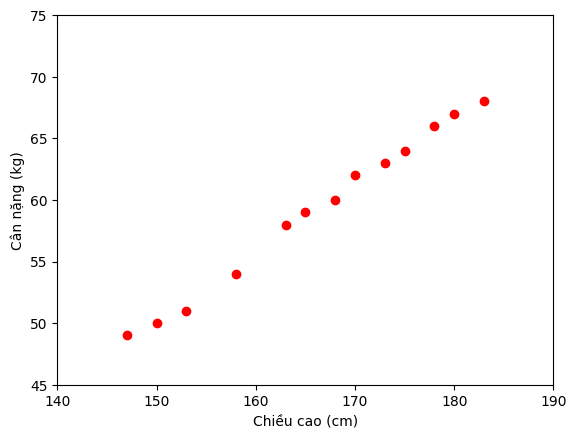

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Chiều cao (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T

# Cân nặng (kg)
y = np.array([[49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Hiển thị dữ liệu
plt.plot(X, y, 'ro')  # Vẽ dữ liệu với màu đỏ (r) và kiểu dấu tròn (o)
plt.axis([140, 190, 45, 75])  # Giới hạn trục: x từ 140-190, y từ 45-75
plt.xlabel('Chiều cao (cm)')  # Nhãn trục x
plt.ylabel('Cân nặng (kg)')  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

In [3]:
# Building trục X
one = np.ones((X.shape[0], 1))
print("one", one)
Xbar = np.concatenate((one, X), axis=1)
print("Xbar", Xbar)

one [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Xbar [[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [4]:
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
print("A", A)
print("Xbar.T", Xbar.T)
print("y", y)
b = np.dot(Xbar.T, y)
print("b", b)
print("np.linalg.pinv(A)", np.linalg.pinv(A))
w = np.dot(np.linalg.pinv(A), b)
print("w = ", w)

A [[1.30000e+01 2.16300e+03]
 [2.16300e+03 3.61527e+05]]
Xbar.T [[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [147. 150. 153. 158. 163. 165. 168. 170. 173. 175. 178. 180. 183.]]
y [[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]
b [[   771.]
 [129198.]]
np.linalg.pinv(A) [[ 1.69874542e+01 -1.01635185e-01]
 [-1.01635185e-01  6.10844845e-04]]
w =  [[-33.73541021]
 [  0.55920496]]


In [5]:
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
print("x0", x0)
y0 = w_0 + w_1 * x0
print("y0", y0)

x0 [145. 185.]
y0 [47.34930928 69.71750775]


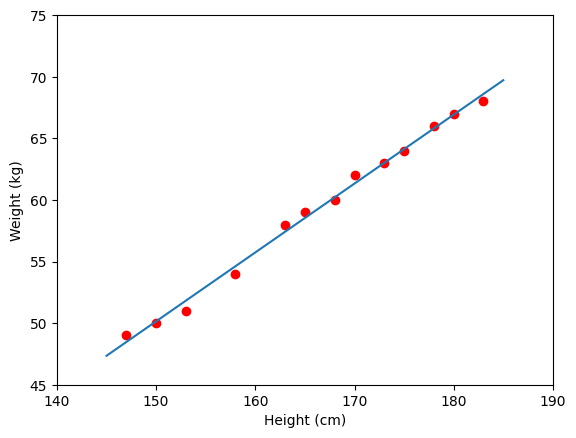

In [6]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')  # data
plt.plot(x0, y0)  # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [7]:
# Dự đoán cân nặng
y1 = w_1 * 155 + w_0
y2 = w_1 * 160 + w_0

print('Dự đoán cân nặng của người có chiều cao 155 cm:', '{:.2f}'.format(y1), 'kg', 'số liệu thật: 52 (kg)')
print('Dự đoán cân nặng của người có chiều cao 160 cm:', '{:.2f}'.format(y2), 'kg', 'số liệu thật: 56 (kg)')

Dự đoán cân nặng của người có chiều cao 155 cm: 52.94 kg số liệu thật: 52 (kg)
Dự đoán cân nặng của người có chiều cao 160 cm: 55.74 kg số liệu thật: 56 (kg)


In [8]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)  # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print('Nghiệm tìm được bằng scikit-learn  : ', regr.coef_)
print('Nghiệm tìm được từ phương trình (5): ', w.T)

Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]
Nghiệm tìm được từ phương trình (5):  [[-33.73541021   0.55920496]]


Kết quả mô hình: w_1 = 1.2754, w_0 = 77.6568

Kết quả kiểm thử:
Độ tuổi: 56, Huyết áp thực tế: 154, Dự đoán: 149.08
Độ tuổi: 56, Huyết áp thực tế: 150, Dự đoán: 149.08
Độ tuổi: 39, Huyết áp thực tế: 144, Dự đoán: 127.40


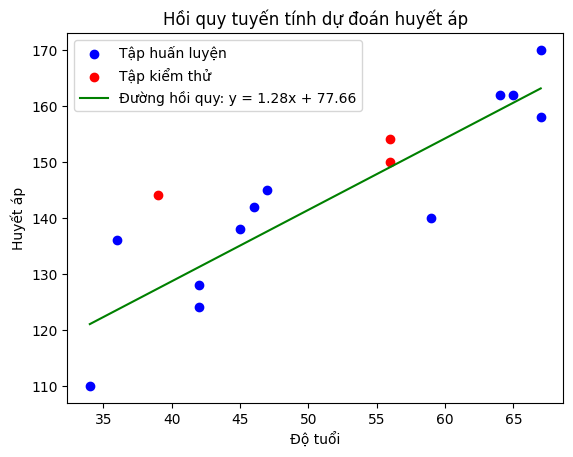

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dữ liệu
age = np.array([39, 36, 45, 47, 65, 46, 67, 42, 67, 56, 64, 56, 59, 34, 42]).reshape(-1, 1)
blood_pressure = np.array([144, 136, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128])

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(age, blood_pressure, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Lấy trọng số w1, w0
w_1 = model.coef_[0]
w_0 = model.intercept_
print(f"Kết quả mô hình: w_1 = {w_1:.4f}, w_0 = {w_0:.4f}")

# Dự đoán
y_pred = model.predict(X_test)

# In kết quả kiểm thử với format chuẩn
print("\nKết quả kiểm thử:")
for i in range(len(X_test)):
    print(f"Độ tuổi: {X_test[i][0]}, Huyết áp thực tế: {y_test[i]}, Dự đoán: {y_pred[i]:.2f}")

# Trực quan hóa
x_line = np.linspace(min(age), max(age), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.scatter(X_train, y_train, color='blue', label='Tập huấn luyện')
plt.scatter(X_test, y_test, color='red', label='Tập kiểm thử')
plt.plot(x_line, y_line, color='green', label=f"Đường hồi quy: y = {w_1:.2f}x + {w_0:.2f}")
plt.xlabel('Độ tuổi')
plt.ylabel('Huyết áp')
plt.title('Hồi quy tuyến tính dự đoán huyết áp')
plt.legend()
plt.show()


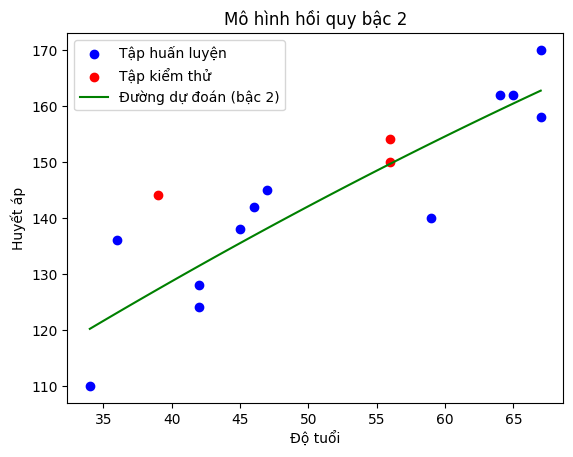

Kết quả kiểm thử:
Độ tuổi: 56, Huyết áp thực tế: 154, Dự đoán: 149.67
Độ tuổi: 56, Huyết áp thực tế: 150, Dự đoán: 149.67
Độ tuổi: 39, Huyết áp thực tế: 144, Dự đoán: 127.28


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Dữ liệu
age = np.array([39, 36, 45, 47, 65, 46, 67, 42, 67, 56, 64, 56, 59, 34, 42]).reshape(-1, 1)
blood_pressure = np.array([144, 136, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128])

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(age, blood_pressure, test_size=0.2, random_state=42)

# Biến đổi thành đa thức bậc 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Dự đoán
y_pred = model.predict(X_test_poly)

# Trực quan hóa
x_line = np.linspace(min(age), max(age), 100).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = model.predict(x_line_poly)

plt.scatter(X_train, y_train, color='blue', label='Tập huấn luyện')
plt.scatter(X_test, y_test, color='red', label='Tập kiểm thử')
plt.plot(x_line, y_line, color='green', label='Đường dự đoán (bậc 2)')
plt.xlabel('Độ tuổi')
plt.ylabel('Huyết áp')
plt.title('Mô hình hồi quy bậc 2')
plt.legend()
plt.show()

# Kết quả kiểm thử
print("Kết quả kiểm thử:")
for i in range(len(X_test)):
    print(f"Độ tuổi: {X_test[i][0]}, Huyết áp thực tế: {y_test[i]}, Dự đoán: {y_pred[i]:.2f}")


Trọng số: w_0 = -14073.1017, w_1 = 5.0524, w_2 = -0.2698, w_3 = -0.0045, w_4 = 1.1341, w_5 = 223.5997, w_6 = -13.4799


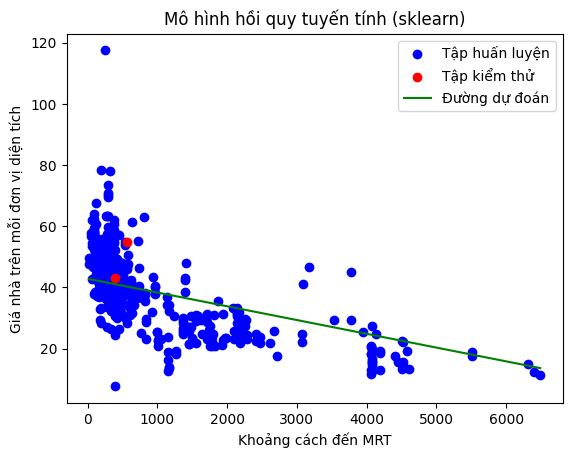

Kết quả kiểm thử:
Dòng 4: Giá thực tế: 54.8, Giá dự đoán: 48.29
Dòng 5: Giá thực tế: 43.1, Giá dự đoán: 46.14


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import dữ liệu từ file CSV
data = np.genfromtxt('Real estate.csv', delimiter=',', skip_header=1)

# Tách biến độc lập (X) và biến phụ thuộc (Y)
X = data[:, 1:7]  # Cột 1-6: X1, X2, X3, X4, X5, X6
y = data[:, 7]    # Cột 7: Y

# Tách tập huấn luyện và kiểm thử
train_idx = np.setdiff1d(np.arange(len(X)), [3, 4])
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[[3, 4]]
y_test = y[[3, 4]]

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Lấy trọng số
w_0 = model.intercept_
w = model.coef_
print(f"Trọng số: w_0 = {w_0:.4f}, w_1 = {w[0]:.4f}, w_2 = {w[1]:.4f}, w_3 = {w[2]:.4f}, w_4 = {w[3]:.4f}, w_5 = {w[4]:.4f}, w_6 = {w[5]:.4f}")

# Dự đoán
y_pred = model.predict(X_test)

# Trực quan hóa (dùng X3 - khoảng cách MRT)
x_line = np.linspace(min(X[:, 2]), max(X[:, 2]), 100).reshape(-1, 1)
X_line = np.c_[np.full((100, 1), X_train[:, 0].mean()), np.full((100, 1), X_train[:, 1].mean()),
               x_line, np.full((100, 1), X_train[:, 3].mean()), np.full((100, 1), X_train[:, 4].mean()),
               np.full((100, 1), X_train[:, 5].mean())]
y_line = model.predict(X_line)

plt.scatter(X_train[:, 2], y_train, color='blue', label='Tập huấn luyện')
plt.scatter(X_test[:, 2], y_test, color='red', label='Tập kiểm thử')
plt.plot(x_line, y_line, color='green', label='Đường dự đoán')
plt.xlabel('Khoảng cách đến MRT')
plt.ylabel('Giá nhà trên mỗi đơn vị diện tích')
plt.title('Mô hình hồi quy tuyến tính (sklearn)')
plt.legend()
plt.show()

# Kết quả kiểm thử
print("Kết quả kiểm thử:")
for i in range(len(y_test)):
    print(f"Dòng {i+4}: Giá thực tế: {y_test[i]}, Giá dự đoán: {y_pred[i]:.2f}")

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/Real estate.csv"

In [21]:
!ls "/content/drive/My Drive/"


'Colab Notebooks'   Oracle   Python  'Software Engineering A Practitioner'\''s Approach (TT).pdf'
